In [13]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

import torchvision
from torchvision import models
from torchvision import transforms

In [18]:
def show_bounding_boxes(image):
    plt.imshow(image)

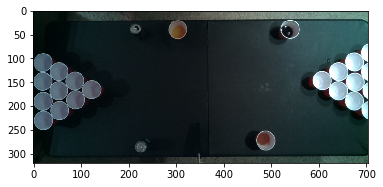

In [30]:

plt.figure()

image_path = "data/input/"
image_name = "image_v2_0.jpg"

show_bounding_boxes(io.imread(os.path.join(image_path, image_name)))

plt.show()

In [ ]:
class CupDataset(Dataset):
    """Beer Pong Cup dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
dataset = torchvision.datasets.

In [7]:
 def LossAccuracy(model, loss_function, dataloader):
    total = 0
    correct = 0
    loss = 0 
    with torch.no_grad():
        for batch, labels in dataloader:
            scores = model(batch)
            _, predicted = torch.max(scores, 1)
            total += labels.size(0)
            correct += (predicted == labels).float().sum().item()
            loss += loss_function(scores, labels)*labels.size(0)

    model_loss = loss/total
    model_accuracy = correct/total
            
    return model_loss, model_accuracy

In [26]:
mobilenet = models.mobilenet_v2(pretrained=True)

for param in mobilenet.parameters():
    param.requires_grad = False

In [27]:
mobilenet

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [4]:
mobilenet.classifier[1] = nn.Linear(in_features=1280, out_features=4, bias=True)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenet.parameters())  

In [ ]:
for epoch in range(1, n_epochs+1):
    
    print('Epoch {}'.format(epoch))
    print('Train loss \t Test loss \t Train acc \t Test acc')
    
    for idx, (batch, labels) in enumerate(MNIST_training_iterator):

        mobilenet.train()
        # forward pass
        scores = mobilenet(batch)

        # compute loss
        loss = loss_function(scores, labels)

        # zero out gradents
        optimizer.zero_grad()
        
        # backpropagate
        loss.backward()
        
        # make a gradient descent step
        optimizer.step()

    # print the loss and accuracy on the whole dataset
    if epoch % display_frequency == 0:
        resnet_model.eval()
        training_loss, training_accuracy = LossAccuracy(mobilenet, loss_function, MNIST_training_iterator)

        testing_loss, testing_accuracy = LossAccuracy(mobilenet, loss_function, MNIST_testing_iterator)

        print('{:0.8f} \t {:0.8f} \t {:0.8f} \t {:0.8f}'.format(training_loss, testing_loss,
                                                                training_accuracy, testing_accuracy))

In [39]:
image_path = "data/input/"
image_name = "image_v2_0.jpg"

img = io.imread(os.path.join(image_path, image_name))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

img =torch.tensor(img, device=device).float()
img.size()
#torch.argmax(mobilenet(img)) 

cpu


torch.Size([320, 704, 3])